## 載入相關套件

In [1]:
import vectorbt as vbt

In [2]:
from numba import njit

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 從Yahoo finance下載股價資料，載入過去五年每日元大台灣50ETF(0050)收盤資料

In [4]:
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\2330.TW.csv',index_col=0,parse_dates=True)

price= data['Close']

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-16,180.0,180.5,179.0,179.5,152.734634,30756000.0
2017-01-17,180.5,181.0,179.5,181.0,154.010971,13159000.0
2017-01-18,180.5,181.0,179.5,181.0,154.010971,23693000.0
2017-01-19,179.5,181.0,179.5,180.5,153.585541,24627000.0
2017-01-20,181.0,181.5,180.5,181.0,154.010971,23429000.0


In [15]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,628.0,645.0,627.0,643.0,643.0,38289770.0
2022-01-11,646.0,651.0,639.0,651.0,651.0,33196585.0
2022-01-12,657.0,660.0,650.0,660.0,660.0,38860063.0
2022-01-13,658.0,662.0,655.0,661.0,661.0,38137411.0
2022-01-14,673.0,673.0,661.0,672.0,672.0,95200777.0


## 設定資料頻率為"日"，並設定交易策略為20天均線和60天均線策略

In [5]:
vbt.settings.array_wrapper['freq'] = 'd'
risk_free=0.01

sma20 = price.rolling(20).mean()
sma60 = price.rolling(60).mean()
entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

pf= vbt.Portfolio.from_signals(price, entries, exits, fees=0.001425,init_cash=10000) #設定交易稅為千分之1.425以及初始資金為10000

## 投資部位變動繪製

<AxesSubplot:>

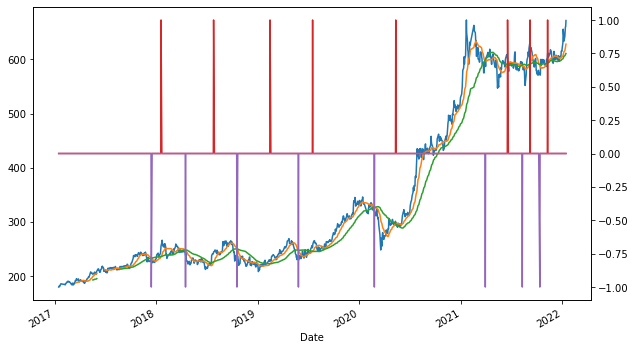

In [6]:
price.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y=True,figsize=(10,6))
(-exits.astype(int)).plot(secondary_y=True,figsize=(10,6))

## 交易進出資料

In [7]:
pf.orders.records_readable

,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,Close,2018-01-19,39.083250,255.5,14.229723,Buy
1,1,Close,2018-04-17,39.083250,238.0,13.255084,Sell
2,2,Close,2018-07-27,37.935955,244.5,13.217361,Buy
3,3,Close,2018-10-19,37.935955,236.0,12.757862,Sell
4,4,Close,2019-02-15,39.327779,227.0,12.721553,Buy
5,5,Close,2019-05-28,39.327779,230.5,12.917701,Sell
6,6,Close,2019-07-18,35.587616,254.0,12.880938,Buy
7,7,Close,2020-02-25,35.587616,322.0,16.329378,Sell
8,8,Close,2020-05-12,38.734238,295.0,16.282905,Buy
9,9,Close,2021-03-30,38.734238,597.0,32.952184,Sell


## 交易圖表繪製

In [8]:
fig = price.vbt.plot(trace_kwargs=dict(name='Close'))
sma20.vbt.plot(trace_kwargs=dict(name='Fast MA'), fig=fig)
sma60.vbt.plot(trace_kwargs=dict(name='Slow MA'), fig=fig)
pf.positions.plot(close_trace_kwargs=dict(visible=False), fig=fig)

FigureWidget({
    'data': [{'name': 'Close',
              'showlegend': True,
              'type': 'scatter…

## 交易獲利統計

In [9]:
pf.total_profit()

12810.465836410984

## 交易數據圖表統計

In [10]:
pf.stats()

Start                         2017-01-16 00:00:00
End                           2022-01-14 00:00:00
Period                         1220 days 00:00:00
Start Value                               10000.0
End Value                            22810.465836
Total Return [%]                       128.104658
Benchmark Return [%]                   274.373259
Max Gross Exposure [%]                      100.0
Total Fees Paid                         313.91344
Max Drawdown [%]                         22.78361
Max Drawdown Duration           294 days 00:00:00
Total Trades                                    8
Total Closed Trades                             7
Total Open Trades                               1
Open Trade PnL                        2041.038562
Win Rate [%]                            42.857143
Best Trade [%]                            101.942
Worst Trade [%]                         -7.978676
Avg Winning Trade [%]                   43.215052
Avg Losing Trade [%]                    -5.282993


## 投組虧損圖繪製

<AxesSubplot:xlabel='Date'>

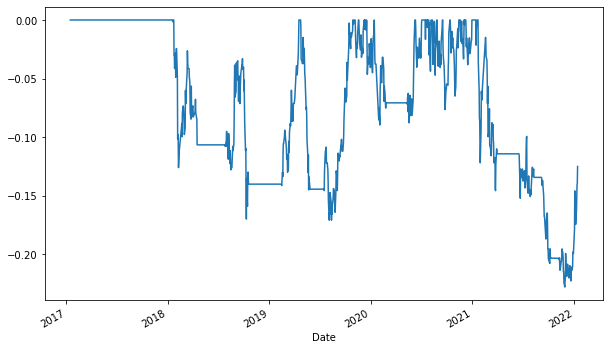

In [11]:
pf.drawdown().plot(figsize=(10,6))

## 投組收益率繪製

<AxesSubplot:xlabel='Date'>

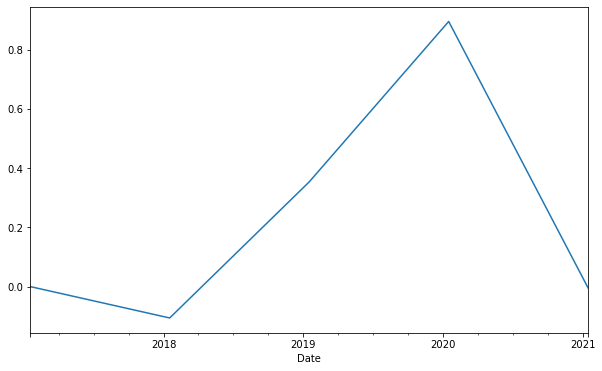

In [12]:
pf.annual_returns().plot(figsize=(10,6))